In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Importation des bibliothéques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")

In [3]:
# Chargement des données
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Aperçu général
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Type de variable et première statistique
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


891 PassengerId distinct tout comme le nombre de passager, très bien.

La répartitions des survivant en fonction des variables dépendantes: PassengeriD etc sera bien entendu analysé avec plus de profondeur plus tard. 

2. Gestion des valeurs manquantes

In [6]:
# Valeurs uniques par colonne
vaunique= df.nunique()
print(vaunique)
print("Survived",df['Survived'].unique())
print("Pclass",df['Pclass'].unique())
print("Sex",df['Sex'].unique())
print("Cabin",df['Cabin'].unique())
print("Embarked",df['Embarked'].unique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Cabin [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Suppression de colonnes à forte proportion de valeurs manquantes
df.drop(columns=['Cabin'], inplace = True)

In [9]:
# Imputation pour 'Age' par la médiane
df['Age'] = df["Age"].fillna(df["Age"].median())
# Imputation pour "Embarked" par la valeur la plus fréquente 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Calcul la valeur ma plus fréquente dans la colonne (le mode).

# Vérification finale des valeurs manquantes
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

3. Analyse descriptive et test statistique

[]

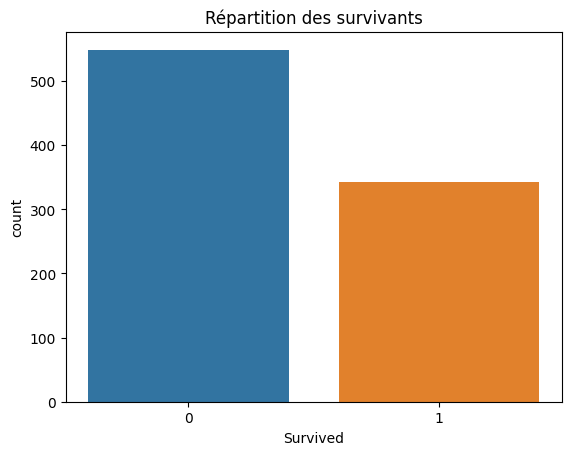

In [10]:
# Visualisation des classes cibles
sns.countplot(x="Survived", data = df);
plt.title("Répartition des survivants")
plt.plot()


In [11]:
# Valeurs uniques par colonne
vaunique= df.nunique().sort_values()
print(vaunique)

# Quantitative discret
print("Survived",df['Survived'].unique())
print("Pclass",df['Pclass'].unique())
print("Sex",df['Sex'].unique())
print("Embarked",df['Embarked'].unique())

# Quantitative continue
print("Age",df['Age'].unique())
print("Fare",df['Fare'].unique())

# 
print("Ticket",df['Ticket'].unique())

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64
Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Age [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.2

En déterminant le nombre de valeur unique par colonne, je détecte les variables d'entrées QUANTITATIVE CONTINUE.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


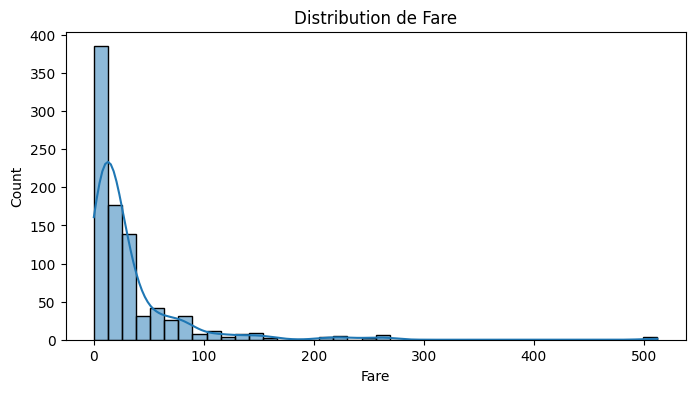

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


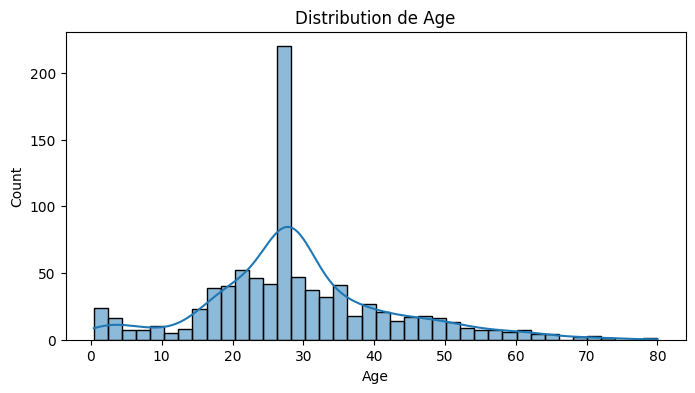

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Distribution de Fare')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=40, kde=True)
plt.title('Distribution de Age')
plt.show()

Pour Fare
Distribution très asymétrique du prix des billets vendus. Les billets les plus chers sont peu représentés par rapport aux billets les moins chers.
Pour Fare, création variable qualitative ordinale avec le découpage par QUANTILE car asymétrie forte notable.

Pour Age
Distribution plutôt symétrique.
Découpage simple suffit.

Je fais le choix de découper ces variables quantitatives oridnale pour améliorer la lisibilité. Pour le calcul du modèle, pas de tranche pour ne pas fausser les résultats.


In [13]:
# Discrétisation d'Age (en intervalles choisi)
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 55, 80], labels=['Child', 'Teen', 'YoungAdult', 'MiddleAge', 'Senior'])

# Discrétisation de Fare (en quantiles pour répartir les effectifs)
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])



In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,YoungAdult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,MiddleAge,VeryHigh
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,YoungAdult,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,YoungAdult,VeryHigh
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,YoungAdult,Mid


In [15]:
from scipy.stats import chi2_contingency

table_fare = pd.crosstab(df['AgeBand'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(table_fare)
print("p-value FareBand:", p)


p-value FareBand: 0.004096873157739237


In [16]:
from scipy.stats import chi2_contingency

table_fare = pd.crosstab(df['FareBand'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(table_fare)
print("p-value FareBand:", p)


p-value FareBand: 2.816616687453629e-17


FareBand
Low         0.197309
Mid         0.303571
High        0.454955
VeryHigh    0.581081
Name: Survived, dtype: float64
AgeBand
Child         0.579710
Teen          0.428571
YoungAdult    0.353271
MiddleAge     0.401130
Senior        0.300000
Name: Survived, dtype: float64


/tmp/ipykernel_13/2134777564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareBand')['Survived'].mean()
/tmp/ipykernel_13/2134777564.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeBand')['Survived'].mean()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(groupe

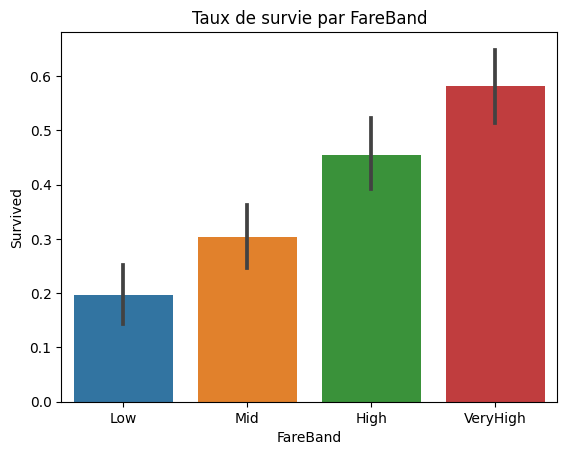

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


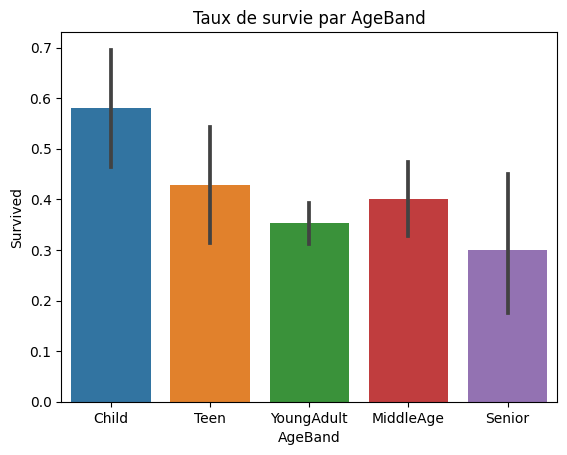

In [17]:
# Fare
fare_survival = df.groupby('FareBand')['Survived'].mean()
print(fare_survival)

# Age
age_survival = df.groupby('AgeBand')['Survived'].mean()
print(age_survival)


sns.barplot(x='FareBand', y='Survived', data=df)
plt.title('Taux de survie par FareBand')
plt.show()

sns.barplot(x='AgeBand', y='Survived', data=df)
plt.title('Taux de survie par AgeBand')
plt.show()


Avec les résultats du chi2, on voit que la tranche tarifaire influe le taux de survie. 
Les riches auraient un taux de survie plus élevé. 
L'histogramme le confirme. 
La tranche d'âge seule n'est pas particulièrement pertinente pour influencer le taux de survie. 
Cependant dans la domaine de la prédiction avec le machine learning la combinaison de variables ayant plus ou moins de l'influence de manière individuelle permettra justemment de faire une prédiction réaliste sur les chances de survie d'un passager.

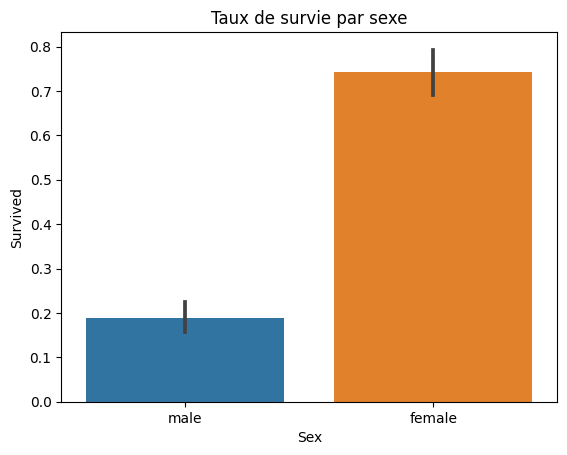

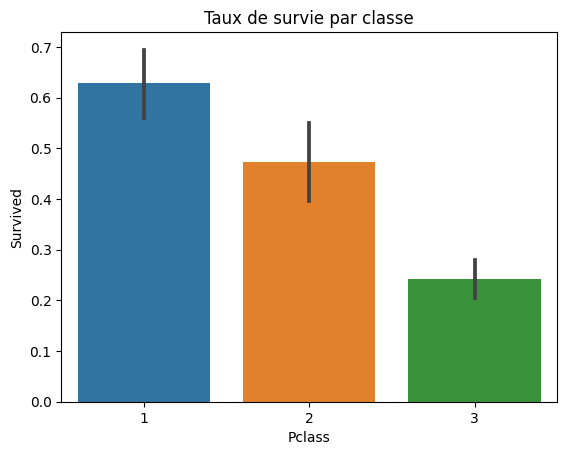

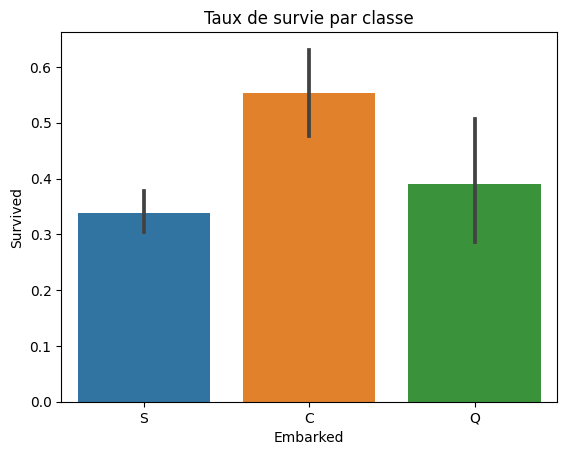

In [18]:
# Comparaison des taux de survie par sexe
sns.barplot(x='Sex',y='Survived', data=df)
plt.title('Taux de survie par sexe')
plt.show()

# Comparaison des taux de survie par classe
sns.barplot(x='Pclass',y='Survived', data=df)
plt.title('Taux de survie par classe')
plt.show()

# Comparaison des taux de survie en fonction de Embarked
sns.barplot(x='Embarked',y='Survived', data=df)
plt.title('Taux de survie par classe')
plt.show()

Taux de survie avec régression logistique en fonction de :

> Sex

> Pclass

> Embarked

> FareBand avec catégorisation du prix des billets... Colonne quantitative continue!

> AgeBand: colonne quantitative continue!


Stratégie:

0. Statistique descriptive avec barplot pour repérer les associations possible, le X ayant un effet significatif sur Y.
1. Estimer effet de plusieurs variables ensemble avec régression logistique
   Encodage nécessaire car par exemple: 
   Pour la varaible "Age", la catégorie "Child" est absente, c'est la catégorie de référence. Elle est implicite pour éviter la multicolinéarité parfaite: 
si on connait 2 colonnes, on peut deviner la 3e. 
3. Visualiser les interraction entre plusieurs variables avec Group By + HeatMap / Barplot
4. Test effet d'une variable quantitative en particulier ANOVA si descretisée ou test de Mann-Whitney.


In [19]:
import statsmodels.api as sm
# Encodage des variables catégorielles 
df_encoded = pd.get_dummies(df[['FareBand','AgeBand','Sex', 'Pclass', 'Embarked']], drop_first=True)
df_encoded = df_encoded.astype(int)  # Convertit tout en entiers

# Définir X (features) et y (cible)
X = df_encoded
y = df['Survived']

# Ajouter constante (intercept)
X = sm.add_constant(X)

# Régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Résumé
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.443738
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3336
Time:                        12:13:19   Log-Likelihood:                -395.37
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.509e-78
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.7676      0.736      7.834      0.000       4.325       7.211
Pclas

Comment lire les résultats d'une régression logistique.

Méthode général:
1. Constater la convergence du modèle.
2. Vérifier la significativité globale du modèle avec LLR p-value
3. Lire les coeffs:
   3.1 Notion x varie d'une unité influence sur y + log-odds (logarithme du rapport de probabilité de survie)
   3.2 Signe du coeff. pour indiquer le sens de l'effet


In [20]:
# Lecture log-odds
Sex_male  = -2.6438 
prop = np.exp(Sex_male)
print("Les hommes ont", round((1-prop)*100),"% moins de chances de survivre que les femmes. Leur chance sont divisés par environ", round(1/prop),".")


Les hommes ont 93 % moins de chances de survivre que les femmes. Leur chance sont divisés par environ 14 .


4. Vérifier la significativité INDIVIDUELLE des variables
5. Utiliser les IC: si l'intervalle contient 0, l'intervelle n'est pas significative.
   Remarque: Si IC = 0, même avec p<0,05, L'effet n'est pas clairement établi.


/tmp/ipykernel_13/3285079232.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['FareBand', 'Pclass'])['Survived'].mean().unstack()
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


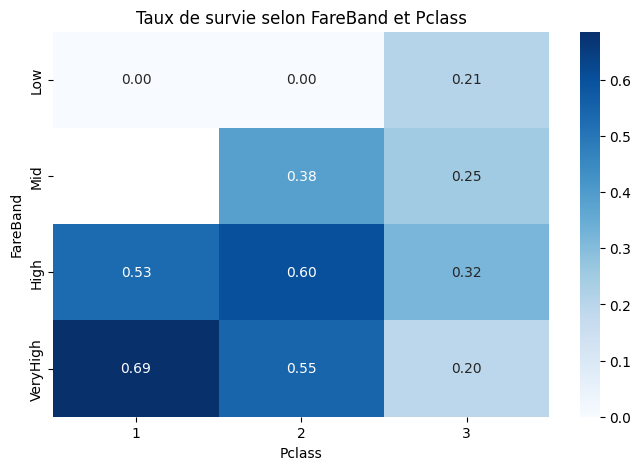

In [21]:

# Calcul du taux de survie moyen pour chaque combinaison FareBand x Pclass
grouped = df.groupby(['FareBand', 'Pclass'])['Survived'].mean().unstack()

# Affichage en heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(grouped, annot=True, cmap='Blues', fmt=".2f")
plt.title("Taux de survie selon FareBand et Pclass")
plt.ylabel("FareBand")
plt.xlabel("Pclass")
plt.show()


Tu es dans la phase exploratoire → tu formules des hypothèses, tu testes visuellement, tu regardes les p-values.

Mais ensuite, dans la phase prédictive, ce qui compte ce n’est plus "ce qui semble utile" à l’œil, mais :

Ce qui améliore la performance du modèle (log-loss, accuracy, f1-score…)

Ce qui réduit l’erreur de prédiction sur les données jamais vues (jeu test)

🧠 Ce que je propose
Même si Pclass et FareBand te semblent donner les mêmes infos à l’œil, c’est dans la phase d'entraînement (sur train.csv) et d'évaluation sur validation/test que tu verras :

Si FareBand améliore la prédiction

Ou si elle est redondante ou bruitée, et qu’il vaut mieux l’enlever